|      |   A   |   A   |   G   |   B  |   T   |
|--------------|--------------|--------------|--------------|--------------|--------------|
|   A   |   0.2   |   0.7   |   0.1   |   0     |   0     |
|   A   |   0     |   0     |   0.5   |   0     |   0.5   |
|   G   |   0     |   0     |   0.2   |   0.8   |   0     |
|   B   |   0.4   |   0.2   |   0     |   0     |   0.4   |
|  T    |   0.7   |   0     |   0     |   0     |   0.3   |


Initial Probabilities
- P(A) = 0.3
- P(A)= 0.4
- P(B) = 0.2
- P(G)=0
- P(T) =0.1

Observation Probabilities

- P(A|1) = 1.0 
- P(A|1) = 0.0 
- P(G|1) = 0.0 
- P(B|1) = 0.0 
- P(T|1) = 0.0 
------------------------------------------
- P(A|2) = 0.5 
- P(A|2) = 0.1 
- P(G|2) = 0.3 
- P(B|2) = 0.1
- P(T|2) = 0.0 
------------------------------------------
- P(A|3) = 0.4
- P(A|3) = 0.1
- P(G|3) = 0.2
- P(B|3) = 0.2
- P(T|3) = 0.1
------------------------------------------
- P(A|4) = 0.0 
- P(A|4) = 0.2 
- P(G|4) = 0.3
- P(B|4) = 0.3 
- P(T|4) = 0.2 
------------------------------------------
- P(A|5) = 0.0 
- P(A|5) = 0.0 
- P(G|5) = 0.0 
- P(B|5) = 0.0 
- P(T|5) = 1.0

Observation Probabilities

- P(A|1) = 1.0 
- P(A|1) = 0.0 
- P(G|1) = 0.0 
- P(B|1) = 0.0 
- P(T|1) = 0.0 
------------------------------------------
- P(A|2) = 0.5 
- P(A|2) = 0.1 
- P(G|2) = 0.3 
- P(B|2) = 0.1
- P(T|2) = 0.0 
------------------------------------------
- P(A|3) = 0.4
- P(A|3) = 0.1
- P(G|3) = 0.2
- P(B|3) = 0.2
- P(T|3) = 0.1
------------------------------------------
- P(A|4) = 0.0 
- P(A|4) = 0.2 
- P(G|4) = 0.3
- P(B|4) = 0.3 
- P(T|4) = 0.2 
------------------------------------------
- P(A|5) = 0.0 
- P(A|5) = 0.0 
- P(G|5) = 0.0 
- P(B|5) = 0.0 
- P(T|5) = 1.0

In [1]:
!pip install networkx

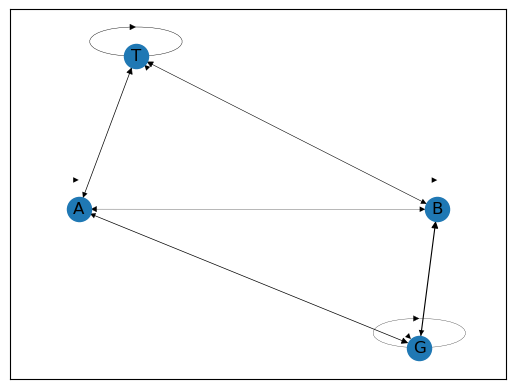

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the states
states = ['A', 'A', 'G', 'B', 'T']

# Define the transition probabilities
transition_probs = {
    'A': {'A': 0.2, 'A': 0.7, 'G': 0.1, 'B': 0, 'T': 0},
    'A': {'A': 0, 'A': 0, 'G': 0.5, 'B': 0, 'T': 0.5},
    'G': {'A': 0, 'A': 0, 'G': 0.2, 'B': 0.8, 'T': 0},
    'B': {'A': 0.4, 'A': 0.2, 'G': 0, 'B': 0, 'T': 0.4},
    'T': {'A': 0.7, 'A': 0, 'G': 0, 'B': 0, 'T': 0.3}
}

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights representing transition probabilities
for state in states:
    for transition, prob in transition_probs[state].items():
        G.add_edge(state, transition, weight=prob)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u, v in G.edges()])

plt.show()


In [13]:
# Initial probabilities
initial_probabilities = {
    "A": 0.3,
    "A": 0.4,
    "G": 0.0,
    "B": 0.2,
    "T": 0.1,
}

# Observation probabilities
observation_probabilities = {
    "1": {
        "A": 1.0,
        "A": 0.0,
        "G": 0.0,
        "B": 0.0,
        "T": 0.0,
    },
    "2": {
        "A": 0.5,
        "A": 0.1,
        "G": 0.3,
        "B": 0.1,
        "T": 0.0,
    },
    "3": {
        "A": 0.4,
        "A": 0.1,
        "G": 0.2,
        "B": 0.2,
        "T": 0.1,
    },
    "4": {
        "A": 0.0,
        "A": 0.2,
        "G": 0.3,
        "B": 0.3,
        "T": 0.2,
    },
    "5": {
        "A": 0.0,
        "A": 0.0,
        "G": 0.0,
        "B": 0.0,
        "T": 1.0,
    },
}

# Define sequences
sequences = {
    "a": "AABGA",
    "b": "ABBGT",
}

# Calculate probability for each sequence
for sequence_name, sequence in sequences.items():
    probability = 1
    for i, state in enumerate(sequence):
        previous_state = sequence[i - 1] if i > 0 else None
        observation = str(i + 1)
        emission_probability = observation_probabilities[observation][state]
        if previous_state:
            transition_probability = initial_probabilities[state] if i == 1 else observation_probabilities[observation][previous_state]
            probability *= transition_probability * emission_probability
        else:
            probability *= initial_probabilities[state] * emission_probability
    print(f"Probability of sequence {sequence}: {probability}")

Probability of sequence AABGA: 0.0
Probability of sequence ABBGT: 0.0
